In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor 


In [2]:
old_df=pd.read_csv("train.csv")
old_df.sample(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
122,123,20,RL,75.0,9464,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,136000
570,571,90,RL,74.0,13101,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2008,WD,Normal,142600
886,887,90,RL,70.0,8393,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Family,145000


## Cleaning

In [3]:
old_df=old_df.drop(columns=["Alley","MasVnrType","FireplaceQu","PoolQC","Fence","MiscFeature","Id"])
a= old_df.isnull().sum()
df=old_df.dropna()


In [4]:
df.sample(3)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
343,120,RL,63.0,8849,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,7,2008,WD,Normal,266000
1121,20,RL,84.0,10084,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,7,2006,New,Partial,212900
809,75,RM,90.0,8100,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,11,2009,WD,Normal,106000


In [5]:
df=df.drop_duplicates()

## LabelEncoder

In [6]:
object_data=df.select_dtypes(include="object")
int_data=df.select_dtypes(exclude="object")
enc=LabelEncoder()
for i in range(0,object_data.shape[1]):
    object_data.iloc[:,i]=enc.fit_transform(object_data.iloc[:,i])

df=pd.concat([int_data,object_data],axis=1)


## Distribution

In [ ]:
sns.pairplot(df)
plt.show()

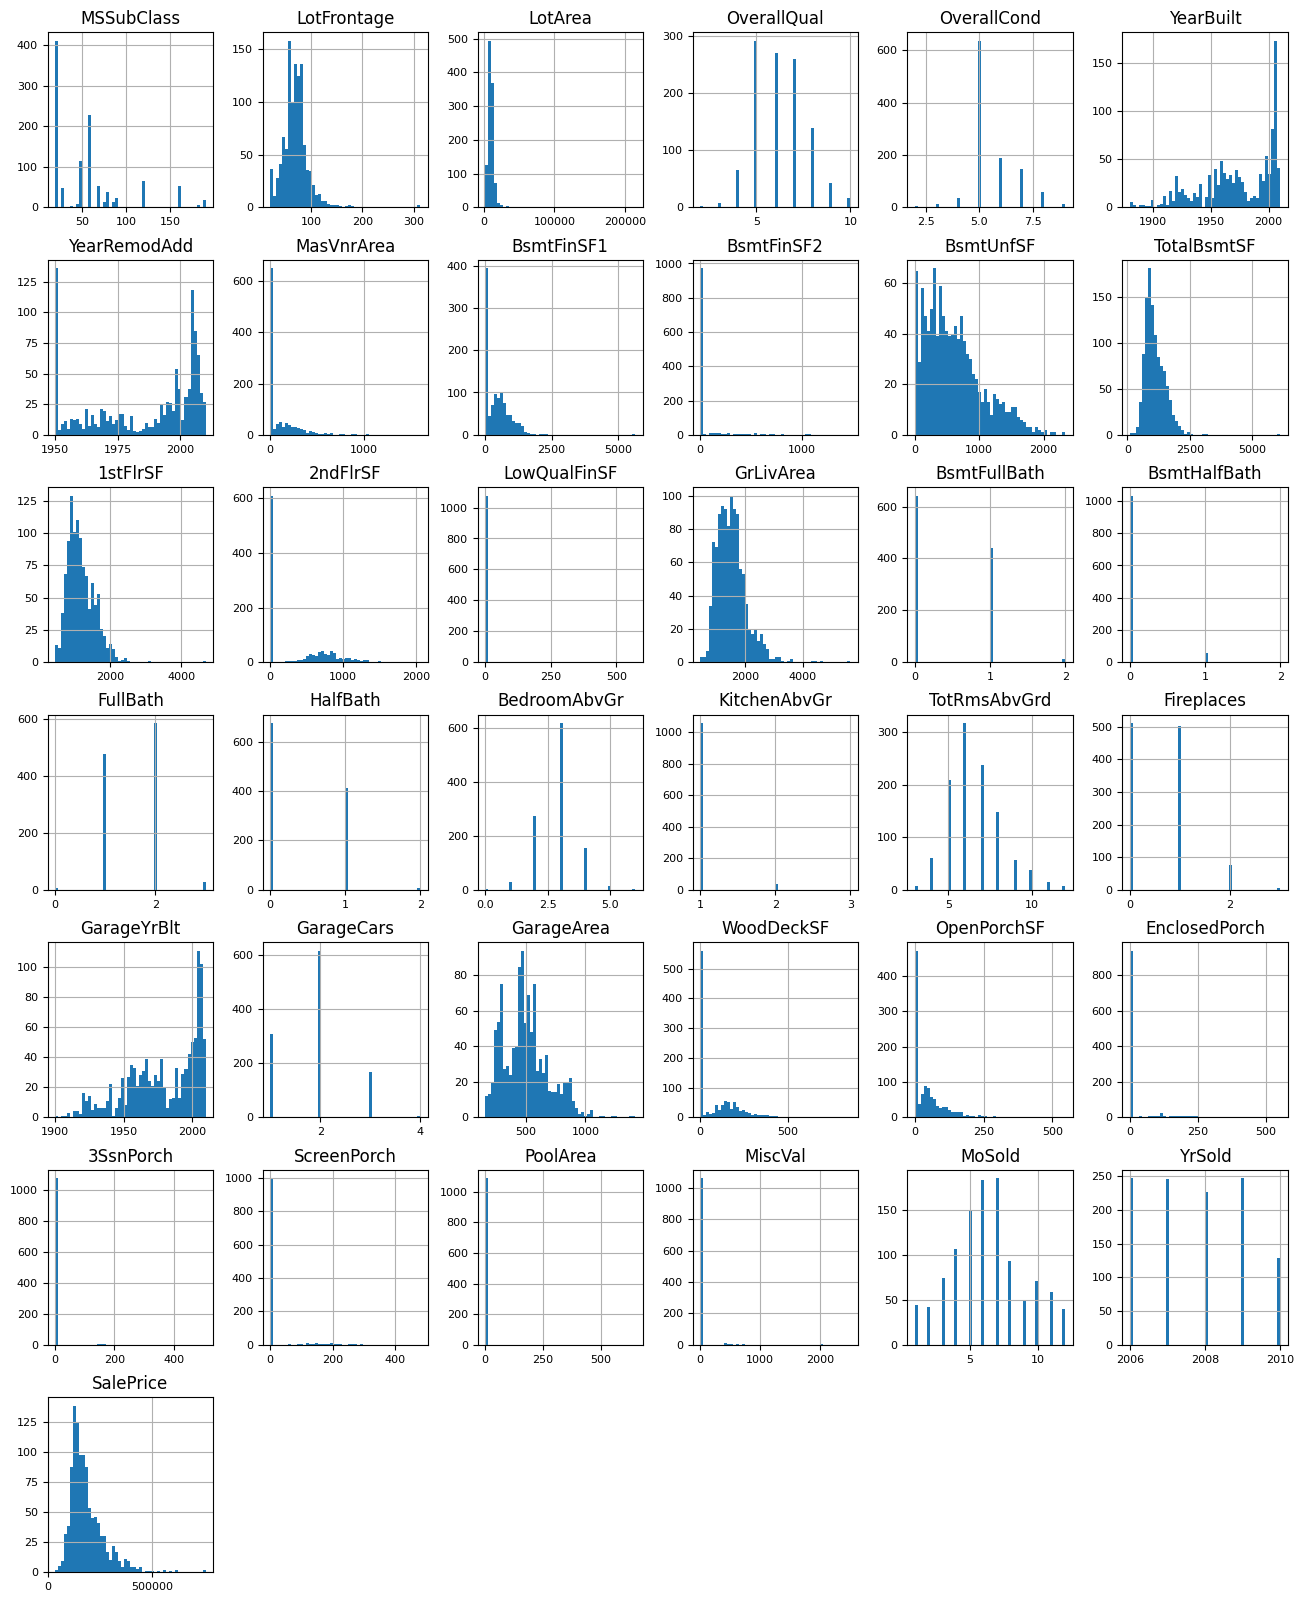

In [7]:
int_data.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);
plt.show()

## Models

In [8]:
x=df.drop(columns="SalePrice")
y=df["SalePrice"]
X_train,X_test,y_train,y_test=train_test_split(x,y,train_size=.83,random_state=42)



In [9]:

model_list={"LinearRegression":LinearRegression(),
           "DecisionTreeRegressor":DecisionTreeRegressor(max_depth=10),
           "RandomForestRegressor":RandomForestRegressor(max_depth=10),
           "MLPRegressor":MLPRegressor(hidden_layer_sizes=[64,150,32],max_iter=1500)
           }

for model_name, model_instance in model_list.items():
    model_instance.fit(X_train, y_train)
    score_train = model_instance.score(X_train, y_train)
    score_test = model_instance.score(X_test, y_test)

    print("Model {}, Train Score: {:.4f}, Test Score: {:.4f}".format(model_name, score_train, score_test))

Model LinearRegression, Train Score: 0.8363, Test Score: 0.8512
Model DecisionTreeRegressor, Train Score: 0.9882, Test Score: 0.7680
Model RandomForestRegressor, Train Score: 0.9734, Test Score: 0.8813
Model MLPRegressor, Train Score: 0.8485, Test Score: 0.7930
